### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


pd.set_option('display.max_rows', 500)	
pd.set_option('display.max_columns', 500)	
pd.set_option('display.width', 1000)	
pd.set_option('max_colwidth', None)	
	
	
from IPython.core.interactiveshell import InteractiveShell	
InteractiveShell.ast_node_interactivity = "all"	

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
data.shape

(12684, 26)

In [6]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.describe(include="O")

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,108,12577,12467,12533,12554,12495
unique,3,4,3,5,5,2,2,8,5,6,25,9,5,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,1d,Female,21,Married partner,Some college - no degree,Unemployed,$25000 - $37499,Scooter and motorcycle,never,less1,1~3,1~3,less1
freq,6283,7305,10069,3230,3996,7091,6511,2653,5100,4351,1870,2013,22,5197,3385,4672,5376,6077


2. Investigate the dataset for missing or problematic data.

In [8]:
#Output % of missing values in each column
print(" \n% total NaN at each column in a DataFrame : \n\n",data.isnull().sum()/len(data)*100)

 
% total NaN at each column in a DataFrame : 

 destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64


3. Decide what to do about your missing data -- drop, replace, other...

In [9]:
#Drop "car" column since it is missng 99% of values
data_new=data.drop('car',axis=1)

In [10]:
#Drop all the missing value records for CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50,as these variables are categorical and only a small percantage of records is missing
data2=data_new.dropna(how="any")
data_new.shape
data2.shape

(12684, 25)

(12079, 25)

4. What proportion of the total observations chose to accept the coupon? 



In [11]:
print('Percent of observations chose to accept the coupon is %.1f%%' % (data2.Y.mean()*100))

Percent of observations chose to accept the coupon is 56.9%


5. Use a bar plot to visualize the `coupon` column.

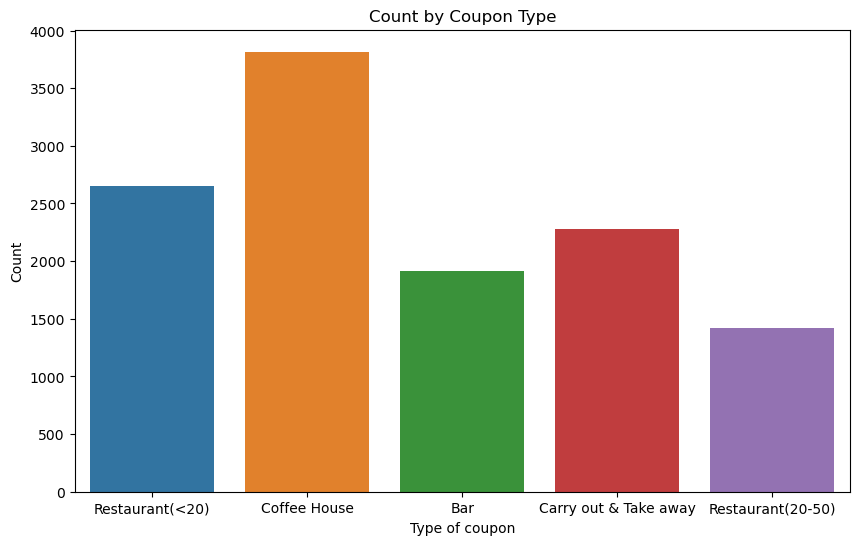

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(data=data2,x='coupon')
plt.xlabel('Type of coupon')
plt.ylabel('Count')
plt.title('Count by Coupon Type')
plt.show();

6. Use a histogram to visualize the temperature column.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


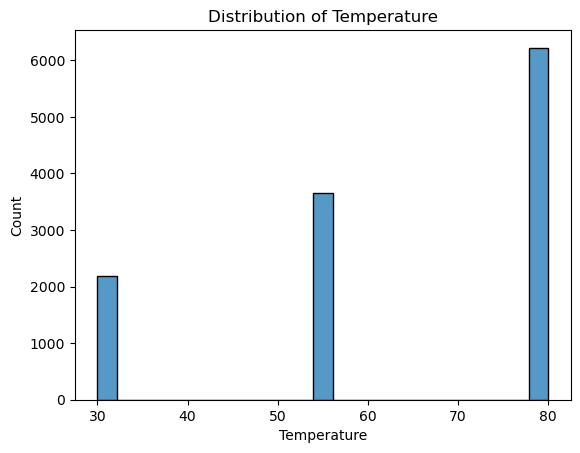

In [13]:
sns.histplot(data2, x= 'temperature')
plt.title('Distribution of Temperature')
plt.ylabel('Count')
plt.xlabel('Temperature')
plt.show();

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [14]:
data_bar=data2.query('coupon=="Bar"')
data_bar.shape

(1913, 25)

2. What proportion of bar coupons were accepted?


In [15]:
print('Percent of the bar coupons accepted is %.1f%%' % (data_bar.Y.mean()*100))

Percent of the bar coupons accepted is 41.2%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [16]:
#pull values for Bar
data_bar.Bar.value_counts()

Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64

In [17]:
#Create a list of values representing going to the bar 3 times or less:
BarList=['never','less1','1~3']

In [18]:
Rate3_less=data_bar.query('Bar in @BarList').Y.mean()*100
print('Acceptance rate for the drivers who went to the bar three times or less in a month %.1f%%' % Rate3_less)

Rate_over3=data_bar.query('Bar not in @BarList').Y.mean()*100
print('Acceptance rate for the drivers who went to the bar more than three times a month %.1f%%' % Rate_over3)

Acceptance rate for the drivers who went to the bar three times or less in a month 37.3%
Acceptance rate for the drivers who went to the bar more than three times a month 76.2%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [19]:
#pull values for Age
data_bar.age.value_counts()

age
21         397
26         368
31         324
50plus     273
36         196
41         171
46         103
below21     81
Name: count, dtype: int64

In [20]:
#Create a list of values representing going to the bar more than once a month:
Bar_over1=['1~3','4~8','gt8']

#Create a list for age > 25:
age_over25=['26','31','50plus','36','41','46']


In [21]:
RateBar_l1_Age_l25=data_bar.query('Bar in @Bar_over1 and age in @age_over25').Y.mean()*100
print('Acceptance rate for the drivers who went to the bar more than once in a month and are older than 25 is %.1f%%' % RateBar_l1_Age_l25)

Rate_other=data_bar.query('~(Bar in @Bar_over1 and age in @age_over25)').Y.mean()*100
print('Acceptance rate for the drivers who went to the bar less than once a month or yonger than 25 is %.1f%%' % Rate_other)

Acceptance rate for the drivers who went to the bar more than once in a month and are older than 25 is 69.0%
Acceptance rate for the drivers who went to the bar less than once a month or yonger than 25 is 33.8%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [22]:
#pull values for passanger
data_bar.passanger.value_counts()

passanger
Alone        1141
Friend(s)     318
Partner       260
Kid(s)        194
Name: count, dtype: int64

In [23]:
passNoKid=['Friend(s)','Partner']

In [24]:
#pull values for occupation
data_bar.occupation.value_counts()

occupation
Unemployed                                   292
Student                                      237
Computer & Mathematical                      225
Sales & Related                              175
Education&Training&Library                   125
Management                                   108
Office & Administrative Support              101
Arts Design Entertainment Sports & Media      88
Business & Financial                          82
Retired                                       71
Healthcare Support                            44
Food Preparation & Serving Related            43
Community & Social Services                   40
Healthcare Practitioners & Technical          36
Transportation & Material Moving              35
Legal                                         34
Protective Service                            27
Architecture & Engineering                    27
Personal Care & Service                       25
Construction & Extraction                     24
Life Phys

In [25]:
Rate_1=data_bar.query('Bar in @Bar_over1 and passanger in @passNoKid and occupation!="Farming Fishing & Forestry"').Y.mean()*100
print('Acceptance rate for the drivers who went to the bar more than once in a month and travel with no kids and do not work in Farming, Fishing and Forestry is %.1f%%' % Rate_1)

Rate_2=data_bar.query('~(Bar in @Bar_over1 and passanger in @passNoKid and occupation!="Farming Fishing & Forestry")').Y.mean()*100
print('Acceptance rate for the other drivers is %.1f%%' % Rate_2)


Acceptance rate for the drivers who went to the bar more than once in a month and travel with no kids and do not work in Farming, Fishing and Forestry is 71.4%
Acceptance rate for the other drivers is 37.9%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [26]:
data_bar.maritalStatus.value_counts()
data_bar.RestaurantLessThan20.value_counts()
data_bar.income.value_counts()

maritalStatus
Married partner      833
Single               638
Unmarried partner    352
Divorced              73
Widowed               17
Name: count, dtype: int64

RestaurantLessThan20
1~3      839
4~8      548
less1    312
gt8      186
never     28
Name: count, dtype: int64

income
$25000 - $37499     300
$100000 or More     282
$12500 - $24999     271
$50000 - $62499     249
$37500 - $49999     247
Less than $12500    159
$75000 - $87499     143
$87500 - $99999     133
$62500 - $74999     129
Name: count, dtype: int64

In [27]:
##Create a list for going to bar >= 1 times
bar_over1 = ['1~3','4~8','gt8']

##Create a list for drivers with no kid passengers
passNoKid = ["Friend(s)","Partner"]

##Create a list for drivers who are not widowed
maritalStatusNotWidowed= ['Unmarried partner', 'Single', 'Married partner', 'Divorced']

#Create a list for age < 30
age_less30 = ['21', '26', 'below21']

#Create a list for going to cheap restaurants more than 4 times
cheapRestaurant_over4 = ['4~8','gt8']

#Create a list for income less than 50K
income_less50K = ['$37500 - $49999','$12500 - $24999','$25000 - $37499','Less than $12500']

In [28]:
Rate_3=data_bar.query('Bar in @bar_over1 and passanger in @passNoKid and maritalStatus in @maritalStatusNotWidowed').Y.mean()*100
print('Acceptance rate for the drivers who went to the bar more than once in a month and had no kids passengers and are not widowed is %.1f%%' % Rate_3)

Rate_4=data_bar.query('Bar in @bar_over1 and age in @age_less30').Y.mean()*100
print('Acceptance rate for the drivers who went to the bar more than once in a month and are under the age of 30 is %.1f%%' % Rate_4)

Rate_5=data_bar.query('RestaurantLessThan20 in @cheapRestaurant_over4 and income in @income_less50K').Y.mean()*100
print('Acceptance rate for the drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is %.1f%%' % Rate_5)


Acceptance rate for the drivers who went to the bar more than once in a month and had no kids passengers and are not widowed is 71.4%
Acceptance rate for the drivers who went to the bar more than once in a month and are under the age of 30 is 72.0%
Acceptance rate for the drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is 45.6%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## *Insights for Bar coupons:*
1. Less than a half (41%) of Bar coupons were accepted by the drivers
2. Drivers who generally go to a bar more and are 25-30 years old tend to accept bar coupons
3. Drivers who tend to go to bars more and don't have kid passengers tend to accept bar coupons
4. Drivers who go to cheap restaurants and earn less than 50k do not tend to accept bar coupons


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [31]:
data_coffee=data2.query('coupon == "Coffee House"')
data_coffee.shape

(3816, 25)

1. What proportion of coffee house coupons were accepted?

In [32]:
print('Percent of the coffee house coupons accepted is %.1f%%' % (data_coffee.Y.mean()*100))

Percent of the coffee house coupons accepted is 49.6%


2. Explore features affecting the Coffee House coupon acceptance

In [33]:
# Create list of numeric columns
numericColumns = data_coffee.select_dtypes(include=np.number).columns.tolist()
print('Numeric Columns:' + str(numericColumns))

# Create list of categorical columns
categoryColumns = list(data_coffee.select_dtypes(['object']).columns)
print('Categorical Columns:' + str(categoryColumns))

Numeric Columns:['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']
Categorical Columns:['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


<Axes: xlabel='destination', ylabel='Y'>

(array([0, 1, 2]),
 [Text(0, 0, 'No Urgent Place'), Text(1, 0, 'Home'), Text(2, 0, 'Work')])

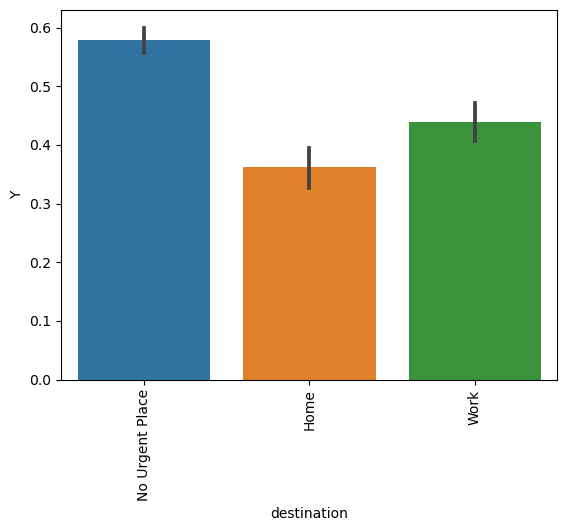

<Axes: xlabel='passanger', ylabel='Y'>

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Friend(s)'),
  Text(1, 0, 'Alone'),
  Text(2, 0, 'Kid(s)'),
  Text(3, 0, 'Partner')])

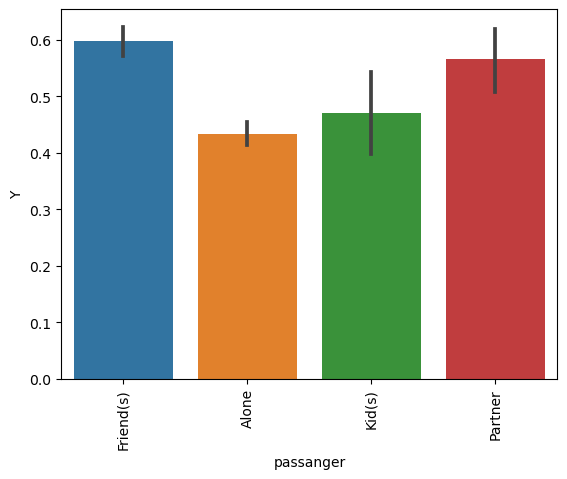

<Axes: xlabel='weather', ylabel='Y'>

(array([0, 1, 2]),
 [Text(0, 0, 'Sunny'), Text(1, 0, 'Rainy'), Text(2, 0, 'Snowy')])

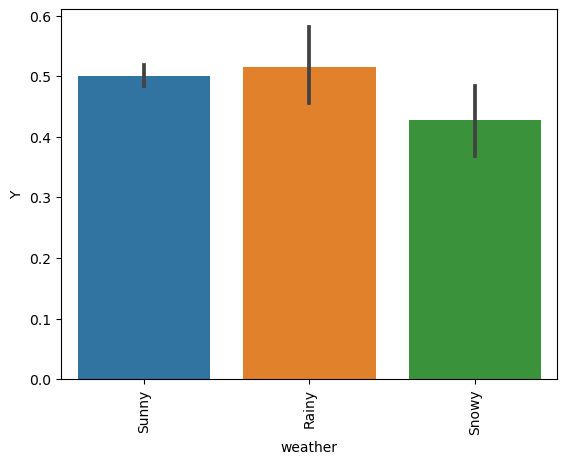

<Axes: xlabel='time', ylabel='Y'>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '10AM'),
  Text(1, 0, '2PM'),
  Text(2, 0, '6PM'),
  Text(3, 0, '7AM'),
  Text(4, 0, '10PM')])

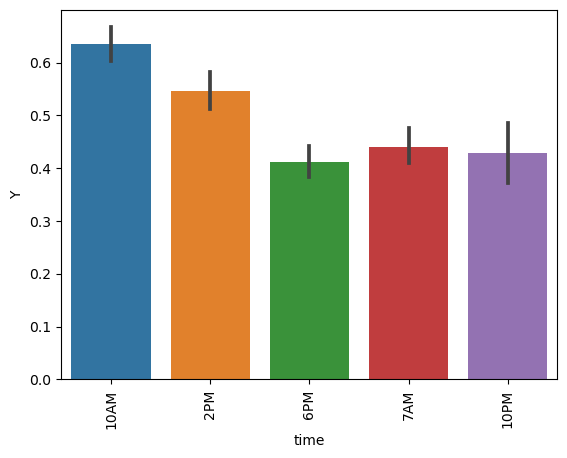

<Axes: xlabel='coupon', ylabel='Y'>

(array([0]), [Text(0, 0, 'Coffee House')])

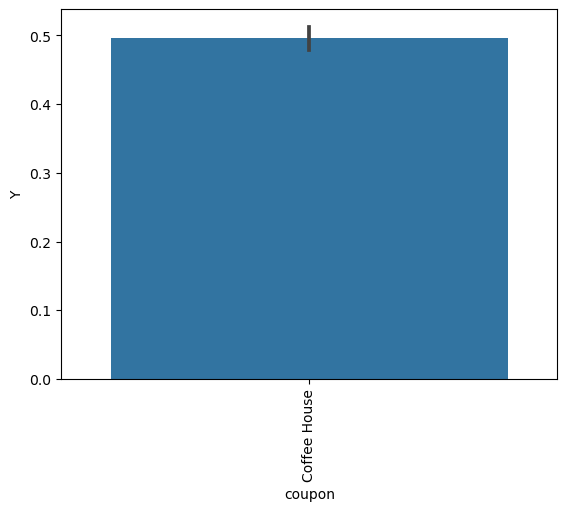

<Axes: xlabel='expiration', ylabel='Y'>

(array([0, 1]), [Text(0, 0, '2h'), Text(1, 0, '1d')])

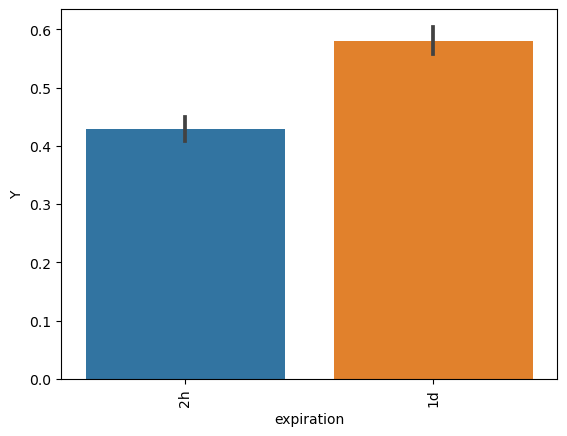

<Axes: xlabel='gender', ylabel='Y'>

(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

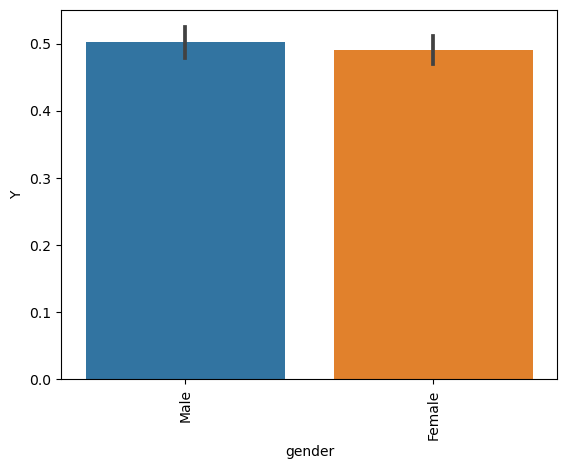

<Axes: xlabel='age', ylabel='Y'>

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '21'),
  Text(1, 0, '46'),
  Text(2, 0, '26'),
  Text(3, 0, '31'),
  Text(4, 0, '41'),
  Text(5, 0, '50plus'),
  Text(6, 0, '36'),
  Text(7, 0, 'below21')])

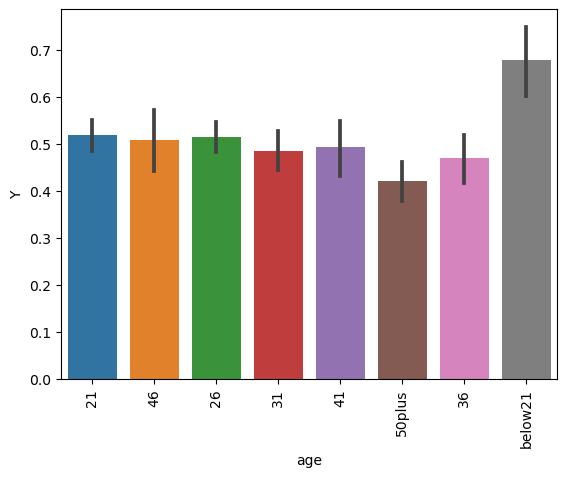

<Axes: xlabel='maritalStatus', ylabel='Y'>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Single'),
  Text(1, 0, 'Married partner'),
  Text(2, 0, 'Unmarried partner'),
  Text(3, 0, 'Divorced'),
  Text(4, 0, 'Widowed')])

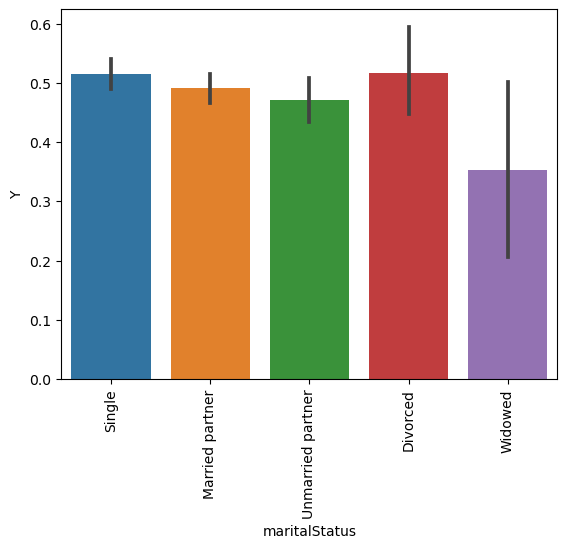

<Axes: xlabel='education', ylabel='Y'>

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Bachelors degree'),
  Text(1, 0, 'Some college - no degree'),
  Text(2, 0, 'Associates degree'),
  Text(3, 0, 'High School Graduate'),
  Text(4, 0, 'Graduate degree (Masters or Doctorate)'),
  Text(5, 0, 'Some High School')])

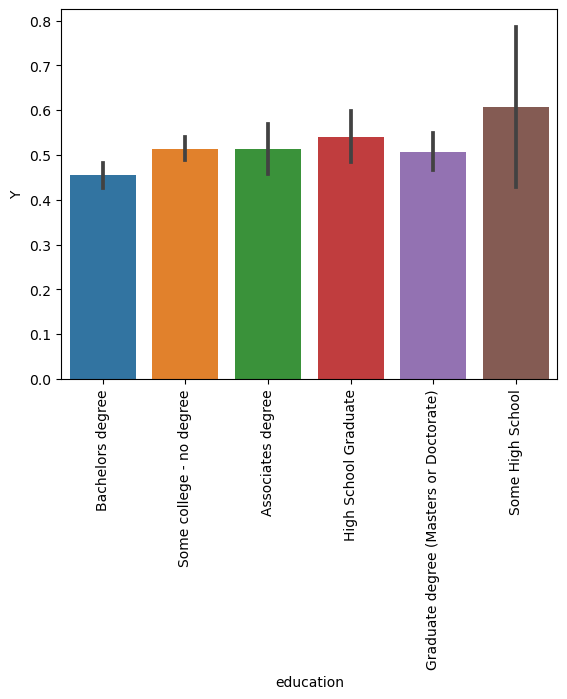

<Axes: xlabel='occupation', ylabel='Y'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Architecture & Engineering'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Education&Training&Library'),
  Text(3, 0, 'Unemployed'),
  Text(4, 0, 'Healthcare Support'),
  Text(5, 0, 'Healthcare Practitioners & Technical'),
  Text(6, 0, 'Sales & Related'),
  Text(7, 0, 'Management'),
  Text(8, 0, 'Arts Design Entertainment Sports & Media'),
  Text(9, 0, 'Computer & Mathematical'),
  Text(10, 0, 'Life Physical Social Science'),
  Text(11, 0, 'Personal Care & Service'),
  Text(12, 0, 'Office & Administrative Support'),
  Text(13, 0, 'Construction & Extraction'),
  Text(14, 0, 'Legal'),
  Text(15, 0, 'Retired'),
  Text(16, 0, 'Community & Social Services'),
  Text(17, 0, 'Installation Maintenance & Repair'),
  Text(18, 0, 'Transportation & Material Moving'),
  Text(19, 0, 'Business & Financial'),
  Text(20, 0, 'Protective Service'),
  Text(21, 0, 'Food Preparation &

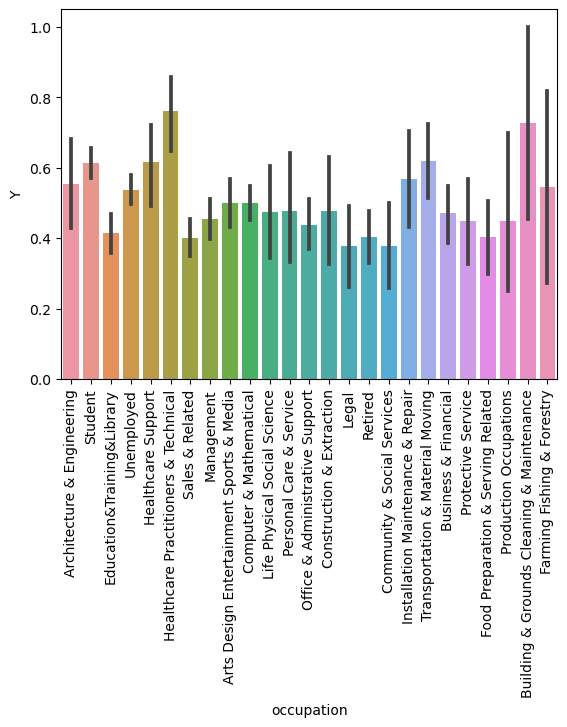

<Axes: xlabel='income', ylabel='Y'>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '$62500 - $74999'),
  Text(1, 0, '$12500 - $24999'),
  Text(2, 0, '$75000 - $87499'),
  Text(3, 0, '$50000 - $62499'),
  Text(4, 0, '$37500 - $49999'),
  Text(5, 0, '$25000 - $37499'),
  Text(6, 0, '$100000 or More'),
  Text(7, 0, '$87500 - $99999'),
  Text(8, 0, 'Less than $12500')])

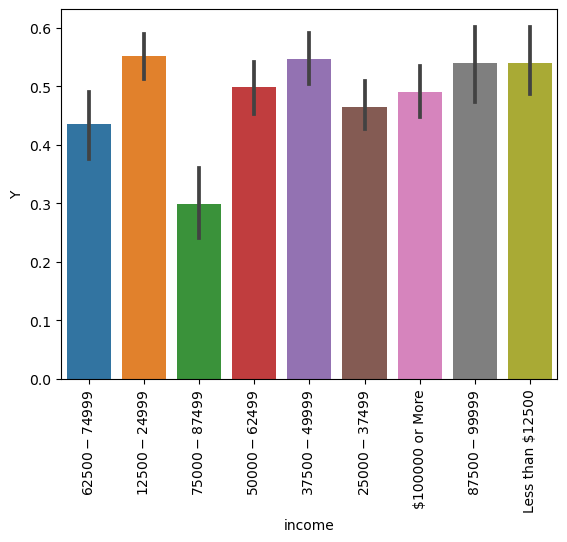

<Axes: xlabel='Bar', ylabel='Y'>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'never'),
  Text(1, 0, 'less1'),
  Text(2, 0, '1~3'),
  Text(3, 0, 'gt8'),
  Text(4, 0, '4~8')])

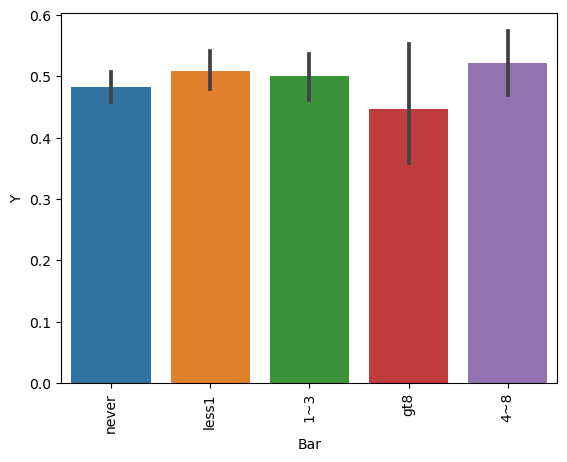

<Axes: xlabel='CoffeeHouse', ylabel='Y'>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'less1'),
  Text(1, 0, '4~8'),
  Text(2, 0, '1~3'),
  Text(3, 0, 'gt8'),
  Text(4, 0, 'never')])

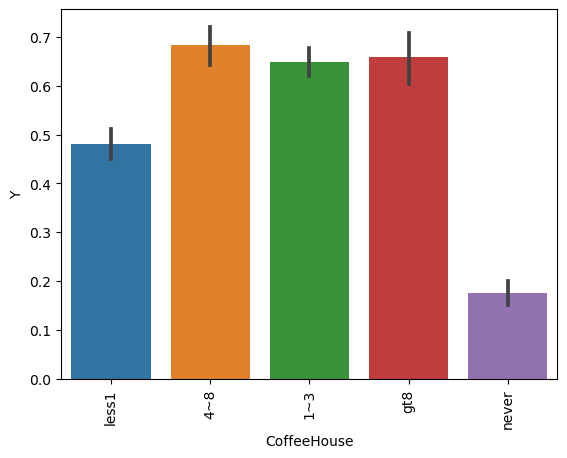

<Axes: xlabel='CarryAway', ylabel='Y'>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '4~8'),
  Text(1, 0, '1~3'),
  Text(2, 0, 'gt8'),
  Text(3, 0, 'less1'),
  Text(4, 0, 'never')])

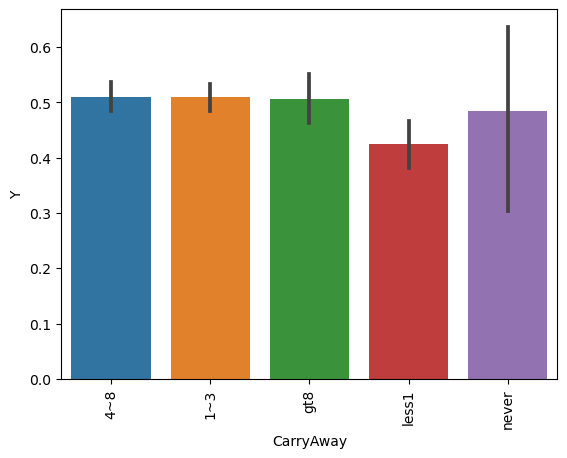

<Axes: xlabel='RestaurantLessThan20', ylabel='Y'>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '4~8'),
  Text(1, 0, '1~3'),
  Text(2, 0, 'less1'),
  Text(3, 0, 'gt8'),
  Text(4, 0, 'never')])

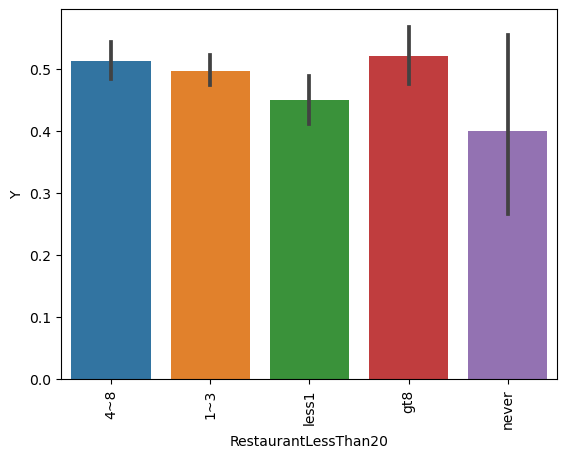

<Axes: xlabel='Restaurant20To50', ylabel='Y'>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'less1'),
  Text(1, 0, 'never'),
  Text(2, 0, '1~3'),
  Text(3, 0, 'gt8'),
  Text(4, 0, '4~8')])

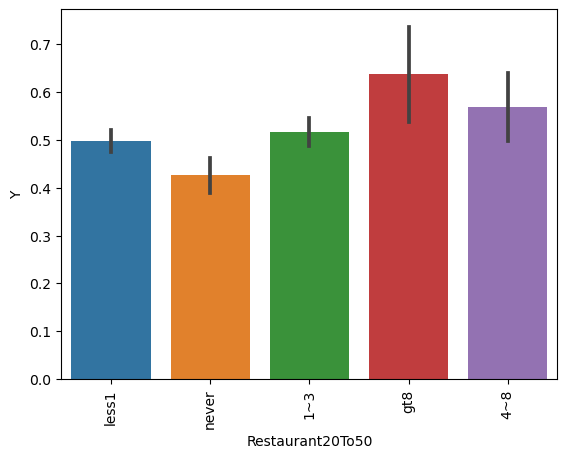

In [34]:
#Create bar plots for all categorical columns 
for k in categoryColumns:
    sns.barplot(data=data_coffee,x=k,y='Y')
    plt.xticks(rotation = 90)
    plt.show();


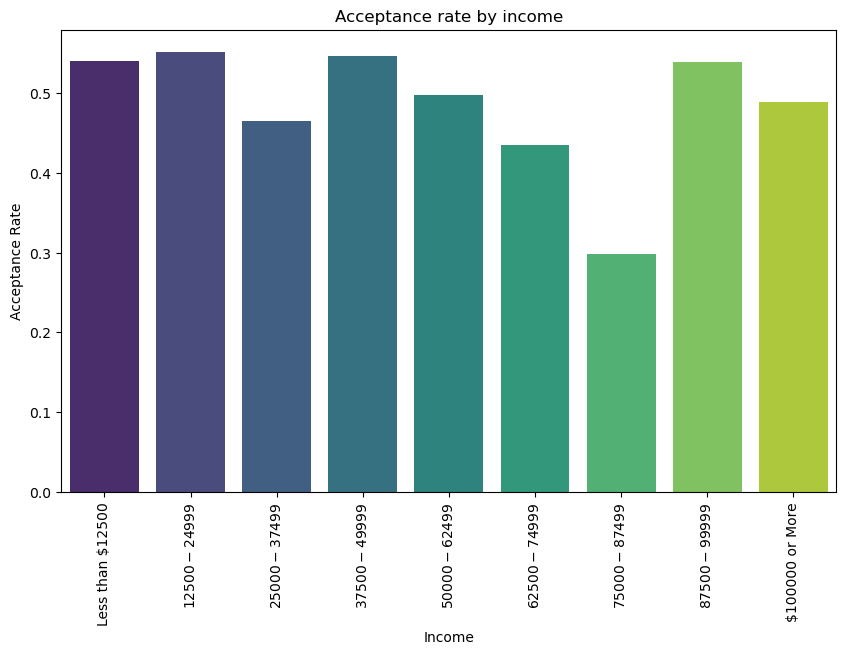

In [35]:
#Examine bar plot for Income with order of categories 	
		
%matplotlib inline		
import matplotlib.pyplot as plt		
		
# Calculate the acceptance rate for each income band	
		
save_df=data_coffee.groupby('income')['Y'].mean().reset_index()		
		
# Specify the order of categories		
order = ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499','$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or More']
		
# Plot the relationship		
plt.figure(figsize=(10, 6))		
sns.barplot(x='income', y='Y', data=save_df,order=order, palette='viridis')		
plt.xlabel('Income')		
plt.ylabel('Acceptance Rate')		
plt.title('Acceptance rate by income')
plt.xticks(rotation = 90)
plt.show();

In [36]:
#Compute correlations of numeric features with target (Y). Removing 'toCoupon_GEQ5min' as all the values are 1

numericColumns=['temperature',
 'has_children',
# 'toCoupon_GEQ5min',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'direction_opp']
target_column = 'Y'

correlations = data_coffee[numericColumns + [target_column]].corr()[target_column][numericColumns]

print(correlations)

temperature          0.071414
has_children        -0.013658
toCoupon_GEQ15min   -0.094128
toCoupon_GEQ25min   -0.089673
direction_same       0.029033
direction_opp       -0.029033
Name: Y, dtype: float64


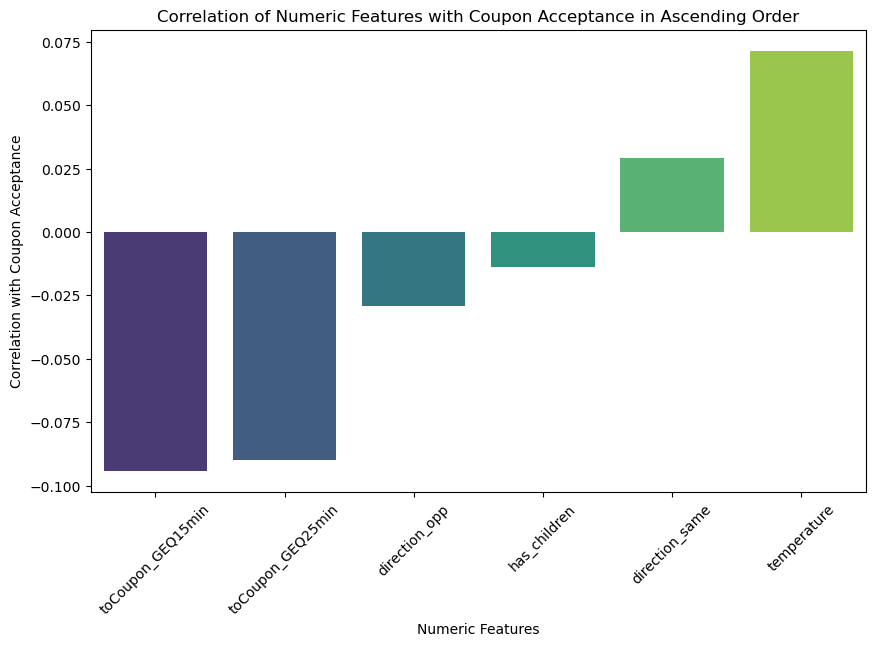

In [37]:
# Sort correlations  and plot					
sorted_correlations = correlations.sort_values()					
									
plt.figure(figsize=(10, 6))					
sns.barplot(x=sorted_correlations.index, y=sorted_correlations.values, palette='viridis')					
plt.xlabel('Numeric Features')					
plt.ylabel('Correlation with Coupon Acceptance')					
plt.title('Correlation of Numeric Features with Coupon Acceptance in Ascending Order')					
plt.xticks(rotation=45)					
plt.show();					

3. Compare the acceptance rate between those who travel at 10AM, have no urgent place to go and have no kid passengers with the rest of the population

In [38]:
##Create a list for drivers with no kid passengers
passNoKid = ["Friend(s)","Partner"]


In [39]:
Rate_a=data_coffee.query('time=="10AM" and destination=="No Urgent Place" and passanger in @passNoKid').Y.mean()*100
print('Acceptance rate for the drivers who who travel at 10AM, have no urgent place to go and have no kid passengers is %.1f%%' % Rate_a)

Rate_b=data_coffee.query('~(time=="10AM" and destination=="No Urgent Place" and passanger in @passNoKid)').Y.mean()*100
print('Acceptance rate for rest of the population is %.1f%%' % Rate_b)

Acceptance rate for the drivers who who travel at 10AM, have no urgent place to go and have no kid passengers is 65.3%
Acceptance rate for rest of the population is 47.4%


4. Compare the acceptance rate between those who are under age of 21, not widowed and go to coffee house at leat once a month with the rest of the population

In [40]:
#Create a list for going to coffee house more than one a month
coffeeTravelList = ['4~8', '1~3', 'gt8']

In [41]:
Rate_c=data_coffee.query('age=="below21" and maritalStatus!="Widowed" and CoffeeHouse in @coffeeTravelList').Y.mean()*100
print('Acceptance rate for the drivers who are under age of 21, not widowed and go to coffee house at leat once a month is %.1f%%' % Rate_c)

Rate_d=data_coffee.query('~(age=="below21" and maritalStatus!="Widowed" and CoffeeHouse in @coffeeTravelList)').Y.mean()*100
print('Acceptance rate for the rest of the population is %.1f%%' % Rate_d)

Acceptance rate for the drivers who are under age of 21, not widowed and go to coffee house at leat once a month is 74.5%
Acceptance rate for the rest of the population is 48.9%


5. Compare the acceptance rate between those who go to cheap at least once a month and who received a coupon with expiration in 1 day with the rest of the population

In [42]:
#Create a list for going to coffee house more than one a month
cheapRestList = ['4~8', '1~3', 'gt8']

In [43]:
Rate_e=data_coffee.query('expiration=="1d" and RestaurantLessThan20 in @cheapRestList').Y.mean()*100
print('Acceptance rate for the drivers who go to cheap restaurants at least once a month and who received a coupon with expiration in 1 day is %.1f%%' % Rate_e)

Rate_f=data_coffee.query('~(expiration=="1d" and RestaurantLessThan20 in @cheapRestList)').Y.mean()*100
print('Acceptance rate for the rest of the population is %.1f%%' % Rate_f)


Acceptance rate for the drivers who go to cheap restaurants at least once a month and who received a coupon with expiration in 1 day is 60.1%
Acceptance rate for the rest of the population is 43.6%


## *Insights for Coffee House coupons:*
1. Almost half of the population accept Coffee House coupons
2. Drivers who travel at 10AM, have no urgent place to go and have  passengers who are not kids are more likely to accept the coupon that the rest of the population
3. Weather and temperature do not seem to significantly affect the likelihood of drivers to accept the coffee house coupons
4. Gender and  education do not seem to significantly affect the likelihood of drivers to accept the coffee house coupons
5. There is no clear relationship between income and coffee hoouse coupon acceptance rate
6. Drivers who are under age of 21, not widowed and go to coffee house at least once a month are significantly more likely to accept the coupons
7. Drivers who go to cheap restaurants at least once a month and who received a coupon with expiration in 1 day tend to accept the coupons compared to the rest of the population